## A07: Evolutionary Algorithm

In [3]:
import numpy as np
import matplotlib.pyplot as plt

This is the evolutionary algorithm class developed on the lectures. This algorithm works for real-valued problems. Feel free to use it, extend it, modify it, or create your own.

In [4]:
class MicrobialGA():
    
    def __init__(self, fitnessFunction, popsize, genesize, recombProb, mutatStd):
        self.fitnessFunction = fitnessFunction
        self.popsize = popsize
        self.genesize = genesize
        self.recombProb = recombProb
        self.mutatStd = mutatStd 
        self.pop = np.random.rand(popsize,genesize)*2 - 1
        
    def best(self):
        bestfit = 0
        for i in range(self.popsize):
            fit = self.fitnessFunction(self.pop[i])
            if fit > bestfit:
                bestfit = fit
        return bestfit
                    
    def runTournament(self):

        # Step 1: Pick 2 individuals at random from the population
        a = np.random.randint(self.popsize)
        b = np.random.randint(self.popsize)
        while (a==b):   # Make sure they are two different individuals
            b = np.random.randint(self.popsize)

        # Step 2: Compare their fitness
        if (self.fitnessFunction(self.pop[a]) > self.fitnessFunction(self.pop[b])):
            winner = a
            loser = b
        else:
            winner = b
            loser = a

        # Step 3: Transfect loser with winner
        for gene in range(self.genesize):
            if (np.random.random() < self.recombProb):
                self.pop[loser][gene] = self.pop[winner][gene]

        # Step 4: Mutate loser and Make sure new organism stays within bounds
        self.pop[loser] += np.random.normal(0.0,self.mutatStd,size=self.genesize)
        self.pop[loser] = np.clip(self.pop[loser],-1,1)

This code exemplifies how to use the class by getting it to solve a very trivial problem: the maximization of ones in a genotype of 10 values. Note we have to create our own fitness function that solves the problem at hand. Note that this fitness function maximizes the number of ones in a genotype because each gene can only take a value between -1 and 1.
We use a population size of 50 individuals. We will pick a recombination probability of 50% and a mutation standard deviation of 0.1. We run the algorithm for 100 generations, where each generation entails running as many tournaments as there are individuals in the population. To make sure that the optimization is working, we visualize the best fitness in the population over time.

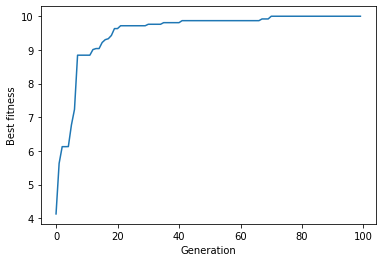

In [5]:
genesize = 10
popsize = 50
recombProb = 0.5
mutatProb = 0.1
generations = 100

def fitnessFunction(genotype):
    return np.sum(genotype)

ga = MicrobialGA(fitnessFunction, popsize, genesize, recombProb, mutatProb)

bestfithist = np.zeros(generations)

for i in range(generations):
    for j in range(popsize):
        ga.runTournament()
    bestfithist[i] = ga.best()

plt.plot(bestfithist)
plt.ylabel("Best fitness")
plt.xlabel("Generation")
plt.show()

1. (6 points) Write some code to find the solution to the Ackley Function (https://en.wikipedia.org/wiki/Ackley_function). Note that the function is a minimization problem. Meaning solutions with lower value are better than solutions with larger values. Note also that the Ackley function receives two parameters and gives you a value. The two parameters that the function takes (x and y) will be the genotype. The result of the function will be the fitness. We know the solution should be f(0,0)=0. So your evolutionary algorithm should find a genotype that approximates the genotype 0,0.

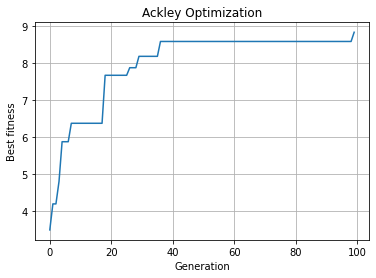

In [6]:
genesize = 2
popsize = 100
recombProb = 0.8
mutatProb = 0.2
generations = 100

# The maximum value this function can have is 1/epsilon. This is the way we turn
# a local minimum into a local maximum.
def ackley(genotype, epsilon=0.1):
    x, y = genotype
    firstTerm = -20*np.exp(-0.2 * np.sqrt(0.5*(x**2 + y**2)))
    rest = -np.exp(0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) + np.e + 20
    return 1/(epsilon + firstTerm + rest)

ga = MicrobialGA(ackley, popsize, genesize, recombProb, mutatProb)

bestfithist = np.zeros(generations)

for i in range(generations):
    for j in range(popsize):
        ga.runTournament()
    bestfithist[i] = ga.best()

plt.plot(bestfithist)
plt.title("Ackley Optimization")
plt.ylabel("Best fitness")
plt.xlabel("Generation")
plt.grid()
plt.show()

2. (6 points) Write some code to find the solution to the Card Problem. You have 10 cards numbered from 1 to 10. You have to choose a way of dividing them into 2 piles, so that the cards in first pile sum to a number as close as possible to 36, and the remaining cards in the second pile multiply to a number as close as possible to 360. Note that you have to figure out what the best genotype encoding is for this problem. Also, importantly, note that the algorithm provided works best for real-valued genotypes. The genotype for this problem will most likely need to be a discrete genotype (0s and 1s) or something similar. You might have to copy and paste the evolutionary algorithm class and make some changes to it to accomodate this change from real values to discrete values. Hint: The main thing that changes is the initialization of the population and the mutation operation. Instead of adding random values to every real-value, you might want to flip some 0s to 1s and some 1s to 0s here and there at random. In addition to solving the problem, tell us: how did you encode the solutions in the genotype? and what fitness function did you use? Did the evolutionary algorithm find the correct optimal answer? What was the answer to the problem? 

In [7]:
class DiscreteGA():
    
    def __init__(self, fitnessFunction, popsize, genesize, recombProb, mutateProb):
        self.fitnessFunction = fitnessFunction
        self.popsize = popsize
        self.genesize = genesize
        self.recombProb = recombProb
        self.mutateProb = mutateProb
        # From numpy docs (adapted for variable names used her):
        #   If gensize is an int, the random sample is generated as if
        #   genesize were np.arange(genesize)
        # So we assume possible gene values are 0, ... , genesize-1
        self.pop = np.random.choice(genesize, size=(popsize,genesize))
        
    def best(self):
        bestfit = 0
        for i in range(self.popsize):
            fit = self.fitnessFunction(self.pop[i])
            if fit > bestfit:
                bestfit = fit
        return bestfit
                    
    def runTournament(self):

        # Step 1: Pick 2 individuals at random from the population
        a = np.random.randint(self.popsize)
        b = np.random.randint(self.popsize)
        while (a==b):   # Make sure they are two different individuals
            b = np.random.randint(self.popsize)

        # Step 2: Compare their fitness
        if (self.fitnessFunction(self.pop[a]) > self.fitnessFunction(self.pop[b])):
            winner = a
            loser = b
        else:
            winner = b
            loser = a

        # Step 3: Transfect loser with winner
        for gene in range(self.genesize):
            if (np.random.random() < self.recombProb):
                self.pop[loser][gene] = self.pop[winner][gene]

        # Step 4: Mutate loser
        for i in range(self.genesize):
            if np.random.random() < self.mutateProb:
                # Select a new value for the gene, different from current one.
                # This assumes that the discrete values are not properly ordered
                # or have no ordering, and are qualitative values (like in the
                # card problem). This could be changed to adding/subtracting 1
                # if the values a gene can take are well-ordered.
                self.pop[loser][i] = np.random.choice(
                    [j for j in range(self.genesize) if j != self.pop[loser][i]],
                    size=1
                )[0] # Gives an array of one element
            
        # self.pop[loser] += np.random.normal(0.0,self.mutateProb,size=self.genesize)
        # self.pop[loser] = np.clip(self.pop[loser],-1,1)

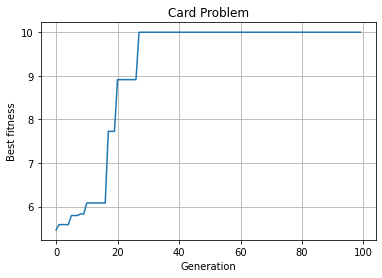

In [8]:
genesize = 10
popsize = 100
recombProb = 0.5
mutatProb = 0.2
generations = 100

def cardProblem(genotype, epsilon=0.1):
    # Identity values
    sumPile = 0
    prodPile = 1
    for i, card in enumerate(genotype):
        if card == 0:
            sumPile += i+1
        elif card == 1:
            prodPile *= i+1
    # Want to use a concave function with a clear max at our optimal value.
    # I made the solution LESS obvious to the algorithm (because the graph was
    # too steep to get to the solution) by scaling the difference between the
    # goal, np.abs(pile-36), down by 1/36.
    sumFitness = 1/(epsilon + np.abs(sumPile - 36)/36)
    prodFitness = 1/(epsilon + np.abs(prodPile - 36)/36)
    
    return (sumFitness + prodFitness)/2

ga = DiscreteGA(cardProblem, popsize, genesize, recombProb, mutatProb)

bestfithist = np.zeros(generations)

for i in range(generations):
    for j in range(popsize):
        ga.runTournament()
    bestfithist[i] = ga.best()

plt.plot(bestfithist)
plt.ylabel("Best fitness")
plt.xlabel("Generation")
plt.grid()
plt.title("Card Problem")
plt.show()

3. (9 points) Open-ended problem. The main two parameters of an evolutionary algorithm are its mutation operator and its recombination operator. Pick one (or if you are ambitious you can do the study for both) and understand the effect that the parameter has on the efficiency of the evolutionary algorithm. So, for example, the question that we are asking is: For the Ackley function, does a large mutation or a small mutation work best to find the solution quickest? Is there a sweetspot? Does a little recombination, medium, or lots of recombination work best? Does recombination help at all? What happens if we set it to 0? Or to 1.0? Is there a sweetspot? I used the Ackley function as an example, but you are welcome to explore any other problem (there are lots of functions here: https://en.wikipedia.org/wiki/Test_functions_for_optimization). Find a way to visualize the results of your experiments and to interpret your results. 


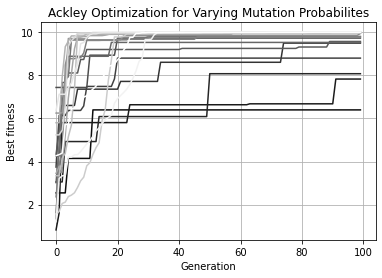

In [55]:
count = 20
finalFitness = np.zeros(count)
mutationProb = 1
for k in range(count):
    genesize = 2
    popsize = 100
    recombProb = 0.8
    generations = 100

    ga = MicrobialGA(ackley, popsize, genesize, recombProb, mutationProb)

    bestfithist = np.zeros(generations)

    for i in range(generations):
        for j in range(popsize):
            ga.runTournament()
        bestfithist[i] = ga.best()

    plt.plot(
        bestfithist,
        color=f"{(k+1)/count}"
    )
    finalFitness[k] = bestfithist[-1]
    mutationProb *= 2/3
plt.title("Ackley Optimization for Varying Mutation Probabilites")
plt.ylabel("Best fitness")
plt.xlabel("Generation")
plt.grid()
plt.show()

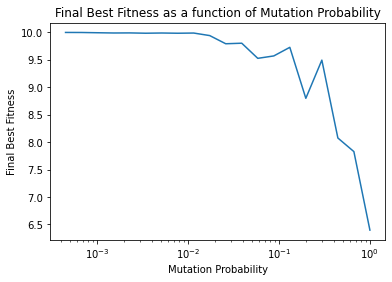

In [56]:
plt.plot([(2/3)**i for i in range(count)], finalFitness)
plt.xscale("log")
plt.title("Final Best Fitness as a function of Mutation Probability")
plt.ylabel("Final Best Fitness")
plt.xlabel("Mutation Probability")
plt.show()

### Reflection

We can see that as the mutation probability gets closer and closer to 1, it is less and less likely that the final generation will have anything remotely as fit as we'd like. I chose to go with an exponentially varying (base = 2/3) mutation probability because I wanted to see what would happen at different orders of magnitude. It's clear that at rather low probabilities, this algorithm works, but I wonder how low would be too low. It takes a very long time to run this on my computer, but if I had better computing capabilities that would be an interesting question to prove with statistical significance!